# Walmart Holiday Sale Prediction
#### In this Kaggle dataset, we are given weekly Walmart sales for 45 stores of Walmart. We are trying to predict if a given record is from a holiday. We are going to create 3 models - Logistic Regression, Support Vector Machine, Decision Tree

### Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('Walmart_Store_sales.csv')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## Feature Engineering: Year & Month

In [4]:
data['Year'] = data['Date'].apply(lambda x: x[-4:])
data['Month'] = data['Date'].apply(lambda x: x[3:5])

data = data.drop('Date', axis=1)

In [5]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03
...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,09
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


## Visualizing Correlations

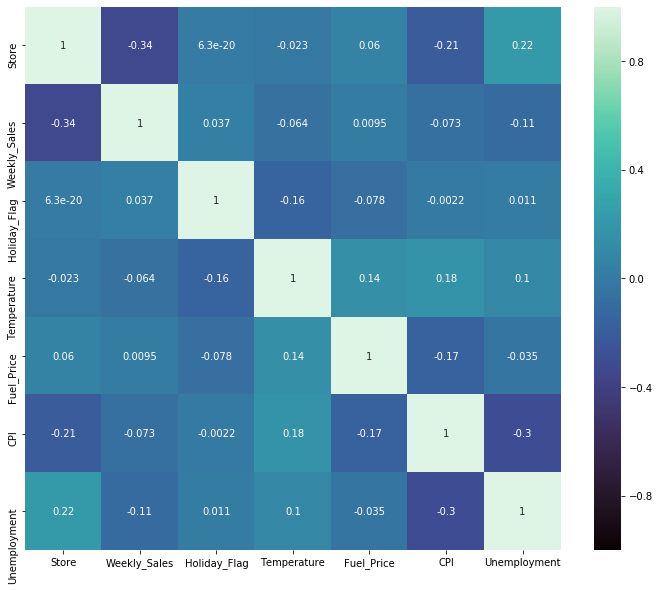

In [27]:
corr = data.corr()

plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=True,vmin=-1.0, cmap='mako')
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

## Encoding Store Column

#### the store has the highest correlation in general with unemployment. However, store is nominal data. It's rating does not really imply any thing. Thus, we will onehot encode it

In [28]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(column,axis=1)
    return df

In [29]:
data = onehot_encode(data, 'Store', 'store')

In [30]:
data

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,store_1,store_2,...,store_36,store_37,store_38,store_39,store_40,store_41,store_42,store_43,store_44,store_45
0,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,0,64.88,3.997,192.013558,8.684,2012,09,0,0,...,0,0,0,0,0,0,0,0,0,1
6431,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,0,0,...,0,0,0,0,0,0,0,0,0,1
6432,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,0,0,...,0,0,0,0,0,0,0,0,0,1
6433,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,0,0,...,0,0,0,0,0,0,0,0,0,1


## Splitting & Scaling

In [31]:
y = data['Holiday_Flag'].copy()
X = data.drop('Holiday_Flag', axis=1).copy()

In [37]:
#take each column and give the mean=0 and variance=1
scaler = StandardScaler() 

X = scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

## Modelling & Train

In [39]:
log_model = LogisticRegression()
svm_model = SVC()
dt_model = DecisionTreeClassifier()

In [40]:
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

print("Models Trained.")

C:\Users\Rajesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rajesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Models Trained.


## Results

In [44]:
print("Logistic Regression Accuracy:", log_model.score(X_test,y_test))
print("SVM  Accuracy:", svm_model.score(X_test,y_test))
print("Decision Tree Accuracy:", dt_model.score(X_test,y_test))

Logistic Regression Accuracy: 0.9331952356292077
SVM  Accuracy: 0.9342309684101502
Decision Tree Accuracy: 0.9590885551527706
